In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [66]:
df=pd.read_csv("Datasets/iris.csv")

In [67]:
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
17            5.1          3.5           1.4          0.3     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
115           6.4          3.2           5.3          2.3  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

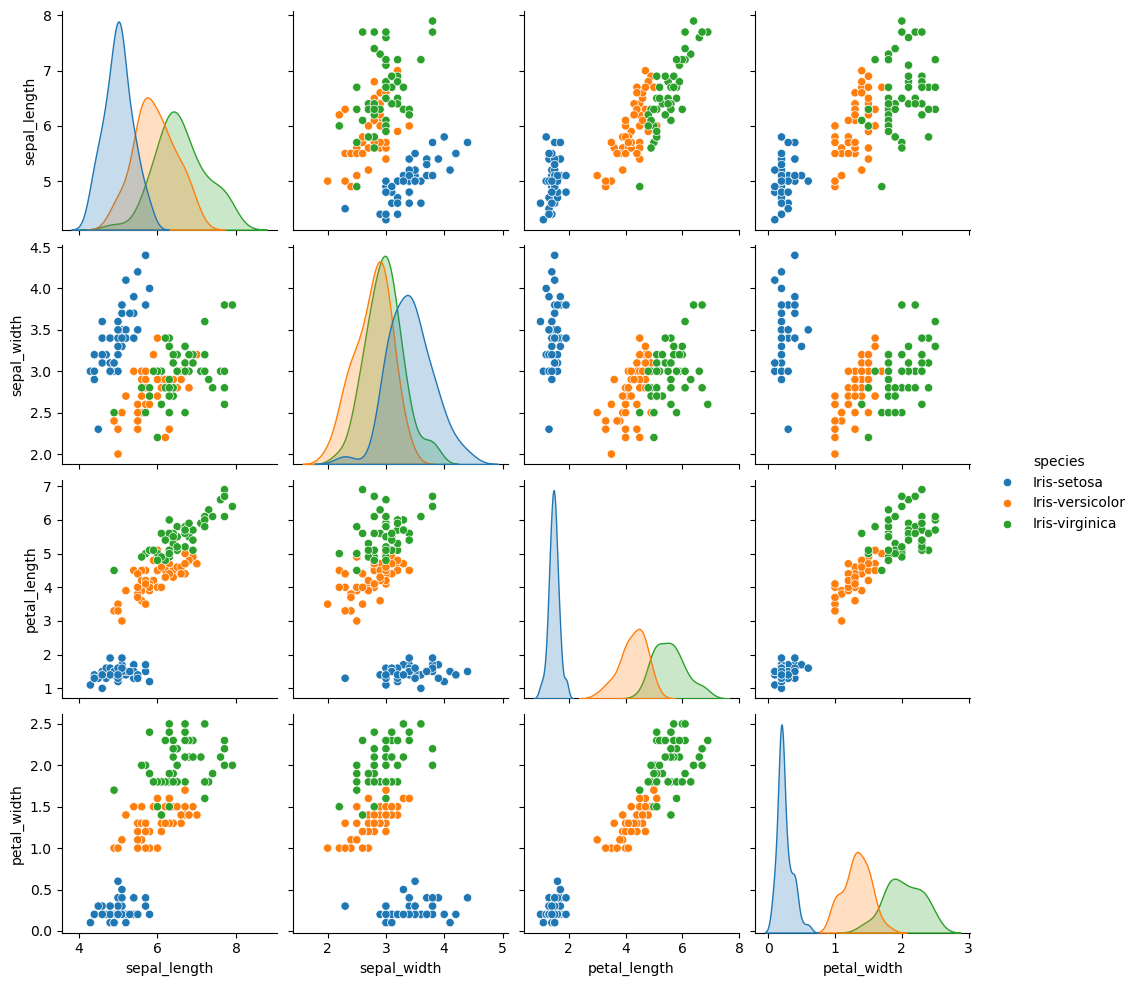

In [70]:
sns.pairplot(df, hue='species')

In [71]:
x=df.drop('species',axis=1)
y=df['species']

In [72]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,           
    test_size=0.2,  
    random_state=42, 
    stratify=y       
)

In [74]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc*100:.2f}%")

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)  
    print(f"{name} Cross-Validation Accuracy: {scores.mean()*100:.2f}% (± {scores.std()*100:.2f}%)")    
    



Logistic Regression Accuracy: 96.67%
K-Nearest Neighbors Accuracy: 100.00%
Decision Tree Accuracy: 93.33%
Random Forest Accuracy: 90.00%
SVM Accuracy: 96.67%
Logistic Regression Cross-Validation Accuracy: 97.33% (± 2.49%)
K-Nearest Neighbors Cross-Validation Accuracy: 96.67% (± 2.11%)
Decision Tree Cross-Validation Accuracy: 95.33% (± 3.40%)
Random Forest Cross-Validation Accuracy: 96.67% (± 2.11%)
SVM Cross-Validation Accuracy: 96.67% (± 2.11%)


In [75]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [76]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [78]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9


In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
